<a href="https://colab.research.google.com/github/HandsomeJames0223/Deep_Learning/blob/main/SimpleCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets.cifar10 import load_data
import pandas as pd
((x_train, y_train), (x_test, y_test)) = load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿", "狗", "青蛙", "馬", "船", "卡車"]

汽車


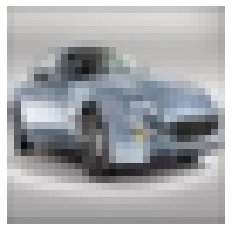

In [ ]:
import random
import matplotlib.pyplot as plt
c = random.randint(0, 49999)
category = y_train[c][0]
# trans[0] -> 飛機
# XX -> trans[ [0] ]
print(trans[category])
plt.axis("off")
plt.imshow(x_train[c])

In [ ]:
# 資料預處理
# 1. 題目預處理(Normalize)
# Keras在準備隨機那組weights，跟Normalize的圖片比較搭
# 1. 第一種方式:0 - 1 第二種方式: -1 - 1
# 攤開 -> Keras MLP 規定一定要攤開成為1維
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# DEMO
x_train_shape[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
# 2.答案預處理(One-hot encoding)
# 希望的樣子: [P0, P1, ..., P9]
# 5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# 可能輸出: [0, 0, 0, 0.2, 0, 0.8, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# DEMO
print("原來:", y_train[1])
print("後來:", y_train_cat[1])

原來: [9]
後來: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from keras.models import Sequential
# MLP
from keras.layers import Dense, Flatten
# Convolution
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential()
# (一個過濾器) 3 * 3 * 3 * (filter數目)32 + (bias)32 = 896
cnn.add(Conv2D(32, (3, 3),
               input_shape=(32, 32, 3),
               padding = "same",
               activation = "relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (一個過濾器) 3 * 3 * 32 * (filter數目)64 + (bias)64 = 18496
cnn.add(Conv2D(64, (3, 3),
               input_shape=(32, 32, 3),
               padding = "same",
               activation = "relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(128, (3, 3),
               input_shape=(32, 32, 3),
               padding = "same",
               activation = "relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
# 確定模型訓練方式...等
# 隨機(隨便選一組weights)梯度(正確方向)下降
# loss: 最後輸出一個: binary_crossentropy; 最後輸出多個: categorical_crossentropy
# metrics: 多一個"accuracy"的輸出
# optimizer: 下降的時候優化 -> 基於動量(我在走的時候不是等速度，而有速度的累積)
cnn.compile(loss = "categorical_crossentropy",
            metrics = ["accuracy"],
            optimizer = "adam")

In [ ]:
# batch: 看幾筆(200)做一次梯度下降(修正)
# epochs: 整份考古題看幾次(10)
# 10個epochs，200batch: 60000 * 10 / 200 -> 3000(次)
cnn.fit(x_train_shape,
        y_train_cat,
        batch_size=200,
        epochs=10,
        validation_split = 0.1)

Epoch 1/10
225/225 [==============================] - 4s 18ms/step - loss: 1.6271 - accuracy: 0.4090 - val_loss: 1.3345 - val_accuracy: 0.5204
Epoch 2/10
225/225 [==============================] - 4s 17ms/step - loss: 1.2028 - accuracy: 0.5744 - val_loss: 1.0648 - val_accuracy: 0.6306
Epoch 3/10
225/225 [==============================] - 4s 17ms/step - loss: 1.0314 - accuracy: 0.6387 - val_loss: 0.9494 - val_accuracy: 0.6750
Epoch 4/10
225/225 [==============================] - 4s 17ms/step - loss: 0.9018 - accuracy: 0.6846 - val_loss: 0.8818 - val_accuracy: 0.6982
Epoch 5/10
225/225 [==============================] - 4s 17ms/step - loss: 0.8089 - accuracy: 0.7180 - val_loss: 0.8958 - val_accuracy: 0.6884
Epoch 6/10
225/225 [==============================] - 4s 17ms/step - loss: 0.7258 - accuracy: 0.7493 - val_loss: 0.7895 - val_accuracy: 0.7236
Epoch 7/10
225/225 [==============================] - 4s 17ms/step - loss: 0.6694 - accuracy: 0.7676 - val_loss: 0.8501 - val_accuracy: 0.7146

In [ ]:
# evaluate: 可以直接算出準確率
cnn.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.8072 - accuracy: 0.7325


[0.8071764707565308, 0.7325000166893005]

In [ ]:
# predict: 機率 predict_classes: 分類
pre = cnn.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
# 正確答案和預測值的混淆矩陣
pd.DataFrame(confusion_matrix(y_test, pre))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0,1,2,3,4,5,6,7,8,9
0,798,19,56,13,11,5,14,5,40,39
1,13,867,6,8,3,5,14,2,10,72
2,64,7,685,59,54,52,44,23,8,4
3,26,12,97,516,39,186,80,26,4,14
4,26,5,111,69,619,35,67,57,8,3
5,17,4,55,144,28,673,28,35,10,6
6,9,3,57,56,12,21,829,3,5,5
7,20,5,40,36,63,63,13,751,1,8
8,79,44,22,17,8,7,11,2,789,21
9,37,88,15,16,1,5,8,15,17,798


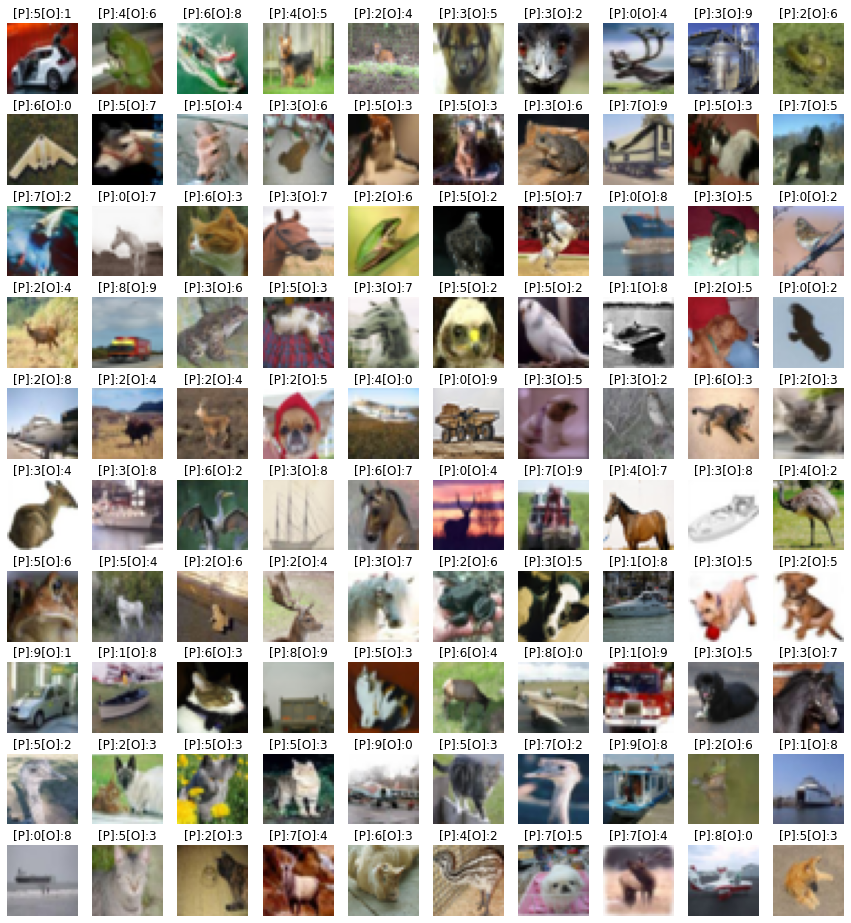

In [ ]:
# numpy才能這樣直接每個數字比較
import numpy as np
# list: list[一個數字]
# numpy array: nparray[ [多個數字] ]
y_dim = y_test.reshape(10000)
diff = np.nonzero(pre != y_dim)[0] # 因為cifar10給的每個答案是用串列形式組成，所以我們只取第一個答案來和題目吻合
# 預測錯誤的圖的原本標籤
orifalse = y_dim[diff]
# 預測錯誤的圖的預測標籤
prefalse = pre[diff]
# 把圖拿出來
imgfalse = x_test[diff]
# 調整圖的大小
plt.figure(figsize=(15, 450))
# 每一列有十個
width = 10
height = int(len(imgfalse) / 10) + 1
# enumerate: 在圖旁邊加索引
for (i, img) in enumerate(imgfalse[0:100]):
    # (列數，行數，第幾張圖(i開始))
    plt.subplot(height, width, i + 1)
    # 關閉座標數字
    plt.axis("off")
    # 標題內容
    t = "[P]:" + str(prefalse[i]) + "[O]:" + str(orifalse[i])
    # 新增標題
    plt.title(t)
    # 秀出圖片
    plt.imshow(img)